In [1]:
import sys
sys.path.append('/Users/bryangonzalez/Documents/Dartmouth/Research/TheoryOfMind_Bx_experiment/Code/models/')
sys.path.append('/Users/bryangonzalez/Documents/Dartmouth/Research/TheoryOfMind_Bx_experiment/Code/')
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import least_squares
import p3_cost_funcs
import comp_models
import utils
import seaborn as sns


dat = pd.read_csv('../data/bx_data.csv', index_col=0)


In [3]:
#GLOBALS
num_invs = 10
num_mults = 3
num_trials =  num_invs * num_mults
invs = np.arange(1, num_invs + 1)
mults = [2,4,6]#np.arange(1, num_invs + 1).tolist()
a = np.repeat(invs, num_mults).tolist()
b = mults * num_invs

 Simulation Trustee without noise using Moral Strategy Model (van Baar et al, 2019)

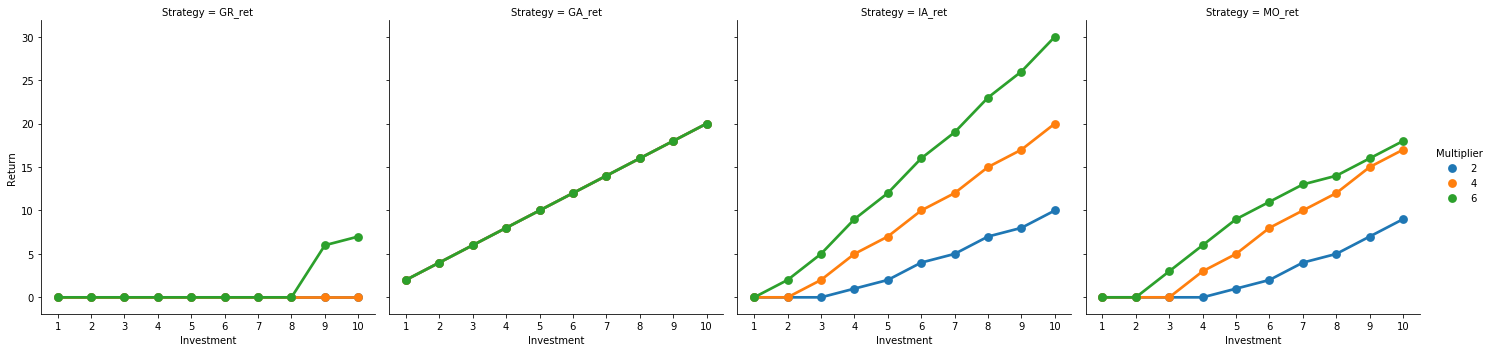

In [9]:
game = pd.DataFrame({
    'Investment': a,
    'Multiplier': b,
    'im': np.multiply(a, b),
    'GR_ret': [comp_models.mp_model_ppsoe(inv=a[x], mult=b[x], theta=.5, phi=0) for x in np.arange(len(a))],
    'GA_ret': [comp_models.mp_model_ppsoe(inv=a[x], mult=b[x], theta=0, phi=-.1) for x in np.arange(len(a))],
    'IA_ret': [comp_models.mp_model_ppsoe(inv=a[x], mult=b[x], theta=0, phi=.1) for x in np.arange(len(a))],
    'MO_ret': [comp_models.mp_model_ppsoe(inv=a[x], mult=b[x], theta=.13, phi=0) for x in np.arange(len(a))]
})
game_lng = game.melt(id_vars=['Investment', 'Multiplier', 'im'], value_vars=['GR_ret', 'GA_ret', 'IA_ret', 'MO_ret'],
                     var_name='Strategy', value_name='Return')
sns.catplot(x='Investment', y='Return', hue='Multiplier', col='Strategy', kind='point', data=game_lng)

Simulation Trustee with normally distributed noise using Moral Strategy Model (van Baar et al, 2019)
N(canonical return , sd= | GA - IA | )

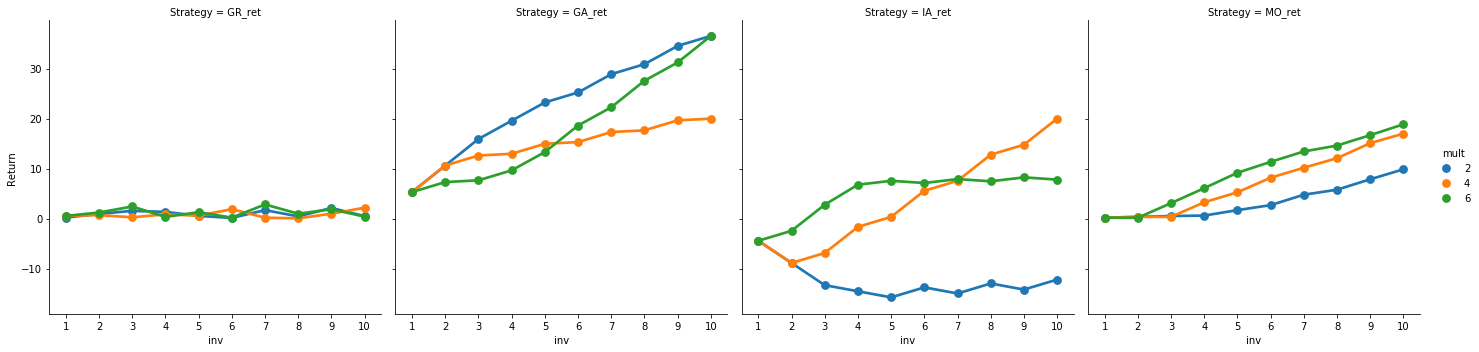

In [19]:
factor = .5
### ADDING NOISE N(exact strategy return, sd = |GA- IA|)
game_n = pd.DataFrame({
    'inv': a,
    'mult': b,
    'im': np.multiply(a, b),
    'canon_GR': game.GR_ret,
    'canon_GA': game.GA_ret,
    'canon_IA': game.IA_ret,
    'canon_MO': game.MO_ret,
    'GR_ret': np.random.exponential(1, num_trials),
    'GA_ret': (np.divide(abs((game['GA_ret'] - game['IA_ret'])), factor)) * np.random.randn() + game['GA_ret'],
    'IA_ret': (np.divide(abs((game['GA_ret'] - game['IA_ret'])), factor)) * np.random.randn() + game['IA_ret'],
    'MO_ret': (np.divide(abs((game['GA_ret'] - game['IA_ret'])), factor)) * np.random.randn() + game['MO_ret'],
    })

game_n_lng = game_n.melt(id_vars=['inv', 'mult', 'im'], value_vars=['GR_ret', 'GA_ret', 'IA_ret', 'MO_ret'],
                     var_name='Strategy', value_name='Return')
sns.catplot(x='inv', y='Return', hue='mult', col='Strategy', kind='point', data=game_n_lng)


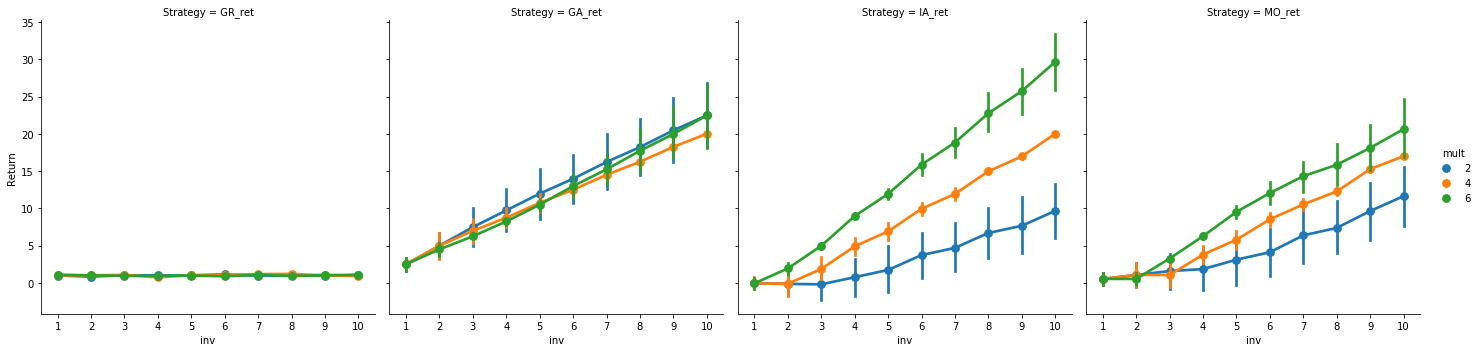

In [20]:
game_n = game_n.sample(num_trials).reset_index(drop=True)

num_sim_games = 100

for i in np.arange(num_sim_games-1):
    c = pd.DataFrame({
        'inv': a,
        'mult': b,
        'im': np.multiply(a, b),
        'canon_GR': game.GR_ret,
        'canon_GA': game.GA_ret,
        'canon_IA': game.IA_ret,
        'canon_MO': game.MO_ret,
        'GR_ret': np.random.exponential(1, num_trials),
        'GA_ret': (np.divide(abs((game.GA_ret - game.IA_ret)), factor)) * np.random.randn() + game.GA_ret,
        'IA_ret': (np.divide(abs((game.GA_ret - game.IA_ret)), factor)) * np.random.randn() + game.IA_ret,
        'MO_ret': (np.divide(abs((game.GA_ret - game.IA_ret)), factor)) * np.random.randn() + game.MO_ret,

    })
    c = c.sample(num_trials)
    game_n = pd.concat([game_n,c], axis=0)


game_n_lng = game_n.melt(id_vars=['inv', 'mult', 'im'], value_vars=['GR_ret', 'GA_ret', 'IA_ret', 'MO_ret'],
                     var_name='Strategy', value_name='Return')
sns.catplot(x='inv', y='Return', hue='mult', col='Strategy', kind='point', data=game_n_lng)


Simulate participant with same trial information as experiment

In [33]:
dat = dat[['trustee','turker_id', 'trial', 'inv','mult', 'im', 'exp','pred', 'ret', 'p2_strat']]
dat['tru_imm_pred'] = np.nan
dat['recov_imm_pred'] = np.nan

dat.head()

/Users/bryangonzalez/opt/anaconda3/envs/mTurk/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/bryangonzalez/opt/anaconda3/envs/mTurk/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,trustee,turker_id,trial,inv,mult,im,exp,pred,ret,p2_strat,tru_imm_pred,recov_imm_pred
0,93,1,0,5,2,10,10,5,7,GA,NaN,NaN
1,93,1,1,9,2,18,18,7,14,GA,NaN,NaN
2,93,1,2,8,4,32,16,20,16,GA,NaN,NaN
3,93,1,3,5,4,20,10,9,10,GA,NaN,NaN
4,93,1,4,3,2,6,6,3,4,GA,NaN,NaN


In [ ]:
niter = 100
results = pd.DataFrame(columns=['trueAlpha', 'trueTau', 'recovAlpha', 'recovTau', 'cost', 'r'])

for turk in dat.turker_id.unique()[:30]:
    print('simulating/recovering turker:', turk)
    # simulate with arbitrary params
    game = dat.loc[dat.turker_id == turk]
    truAlpha = np.random.uniform()
    truTau = np.random.uniform(low=.001, high=.5)
    truGame = game.copy()
    truGame['pred'] = comp_models.imm_learn(game=truGame,folk_thry=utils.folk_params, alpha=truAlpha,tau=truTau)
    #Fit the simulation
    fitIters = np.zeros([niter, 5])
    for i in range(niter):
        param0 = [np.random.uniform(), np.random.uniform(low=.001, high=.5)]
        fitIters[i,0:2] = [param0[0], param0[1]]
        result_lsq = least_squares(fun=p3_cost_funcs.imm_costfun, x0=param0, args=(truGame,utils.folk_params ), bounds=([0,.001], [1,.5]))

        [param1, param2] = result_lsq.x
        cost = result_lsq.cost
        fitIters[i, 2:5] = [param1, param2, cost]
    cost_selected = np.min(fitIters[:, 4])
    recovAlpha = fitIters[fitIters[:,4]== cost_selected, 2][0]
    recovTau = fitIters[fitIters[:,4]== cost_selected, 3][0]
    sse = cost_selected* 2
    #simulate with fitted params
    recovGame = game.copy()
    recovGame['pred'] = comp_models.imm_learn(game=recovGame,folk_thry=utils.folk_params, alpha=recovAlpha,tau= recovTau)
    # correlate initial and recovered model predictions
    r = scipy.stats.pearsonr( truGame['pred'], recovGame['pred'] )
    results = results.append(pd.DataFrame(
        [[truAlpha, truTau, recovAlpha, recovTau, sse, r]], columns=results.columns))
    if turk%5 == 0:
        results.to_csv('results/param_recov_'+str(niter)+'iters_newBounds.csv', sep=',')

simulating/recovering turker: 1
simulating/recovering turker: 3
simulating/recovering turker: 4
simulating/recovering turker: 5
simulating/recovering turker: 7
simulating/recovering turker: 9
simulating/recovering turker: 10
simulating/recovering turker: 11
simulating/recovering turker: 13
simulating/recovering turker: 14
simulating/recovering turker: 15
simulating/recovering turker: 16
simulating/recovering turker: 17
simulating/recovering turker: 18
simulating/recovering turker: 19
simulating/recovering turker: 20
simulating/recovering turker: 21
simulating/recovering turker: 22
simulating/recovering turker: 23


In [6]:
results.to_csv('results/param_recov_'+str(niter)+'iters.csv', sep=',')


In [24]:
results = pd.read_csv('results/param_recov_300iters.csv', index_col=0).reset_index(drop=True)

results['r_val'] = [float(results['r'][x].strip(')(').split(',')[0]) for x in np.arange(len(results))]
results['corr_pVal'] = [float(results['r'][x].strip(')(').split(',')[1]) for x in np.arange(len(results))]

In [31]:
trialCorr = np.mean(results['r_val'])
alphaCorr = scipy.stats.pearsonr(results['trueAlpha'],results['recovAlpha'])
tauCorr = scipy.stats.pearsonr(results['trueTau'],results['recoveTau'])
print(trialCorr)
print(alphaCorr)
print(tauCorr)
scipy.stats.ttest_1samp(results['r_val'],0,nan_policy='omit')

0.5305454756327087
(-0.0032519565442005495, 0.9483047672823087)
(0.12045695834534006, 0.015935804412247952)


Ttest_1sampResult(statistic=85.93867093720115, pvalue=1.609203566732394e-259)

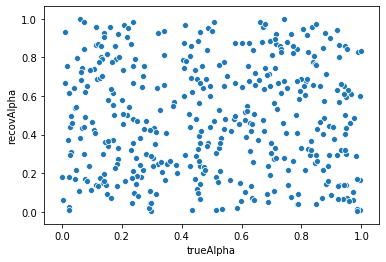

In [32]:
import seaborn as sns
sns.scatterplot(x='trueAlpha', y='recovAlpha', data=results)

In [28]:
scipy.stats.pearsonr(results['trueAlpha'],results['recovAlpha'])

KeyError: 'truAlpha'